## Flood Susceptibility predictions Using Machine Learning

Floods are among the most significant natural disasters that cause enormous economic and social impacts. Therefore, identifying flood-prone areas and understanding the factors contributing to flood susceptibility is essential for effective flood management and mitigation strategies. Remote sensing data and machine learning techniques can be used to predict flood susceptibility, which can provide valuable information to policymakers, planners, and decision-makers.

Research Questions:

* What is the accuracy of using remote sensing data and machine learning algorithms for flood susceptibility prediction?
* Which remote sensing data and machine learning algorithms are most effective in predicting flood susceptibility?
* How do topographic factors such as slope and elevation contribute to flood susceptibility prediction?
* What is the role of land use and land cover data in predicting flood susceptibility, and which land use types are most vulnerable to flooding?
* How can the accuracy of flood susceptibility predictions be improved, and what are the main challenges in using remote sensing data and machine learning algorithms for flood susceptibility mapping?

By answering these research questions, we can gain a better understanding of the potential of remote sensing data and machine learning algorithms in flood susceptibility mapping and develop effective flood management and mitigation strategies.


In predicting flood susceptibility using remote sensing data and machine learning techniques, various factors need to be considered. The following are some of the critical factors that can influence flood susceptibility:

* Topographic Factors: The topography of a region can significantly impact flood susceptibility. For instance, regions with a steep slope are more prone to floods than flat regions. High elevations can also increase the risk of flash floods. Therefore, elevation and slope are essential topographic factors to consider when predicting flood susceptibility.

* Land Use/Land Cover: Land use and land cover data provide information on the type of vegetation and the degree of soil permeability, which can affect the amount of water that infiltrates the soil. Land use changes, such as deforestation, urbanization, and agriculture, can alter the natural hydrology of a region, leading to an increased risk of flooding.

 ### Details on the dataset on which the discovery is being performed (dependent variable)

The flood dataset use in this analysis is collected from the Historical flood event of Canada. Link to historical flood dataset 
https://open.canada.ca/data/en/dataset/fe83a604-aa5a-4e46-903c-685f8b0cc33c
The historical flood data was explored on ArcGIS online, when exploring the dataset it can be seen that Qubec is one of the Provinces in Canada that have a long history of various flood occurences, therefore a more simplified shepfile of Quebec will be used to determine the Area of interest for this study


### Data preprocessing details on the independent variables that are included, including source and why it was selected


The indepernets variabls use in this flood suspeitbility prediciton uisng Machine learning are

* Slope
* Elevation and
* Land use

This variable were selected because accroding to various studies, they are the most important factor when prediciton flood occurence, The elevation and slope is the terrain characterisitcs why the landuse represent the socio economic/ enviornemnetal data that helps us to understand human activies on land that can influence flooding.

All the dataset were extracted from the google earth enigne data catalogue uisng the gogole earth enigne python API, the dataset was clipped to the seleted study area. the data were download. The To populate the training dtaset, the flood and non flooded area points that was collected in this study was used to extrat the value of eah varile at every point, this data was added to the attributes of the point data.

### The task that has been selected and why, e.g: are you performing classification or regression

This task is going to be a classifiation problem, i will be predicitng where a location is liable to flooding or not, and the probability of the prediction can be use to access the probbility of flood happening in each location.

### The selection of the algorithm and why, e.g.: CART, random forest, etc.

Random Forest algorithm  will be used in this analysis and here is why 

* Random Forest is a type of computer program that can help predict which areas are most  susceptible to flooding. It's really good at handling lots of different types of information all at once, like what the land is made of, how steep it is, and what kind of things people do there.

* Unlike other programs, Random Forest doesn't need to make any special guesses about the information it's looking at. It can work with all sorts of different types of data, like numbers, words, or pictures.

* It can also look at how different types of information work together to make flooding more likely. For example, it can see that certain types of land might be more likely to flood if they're also really steep.

* Random Forest can use all of this information to make a map that shows which areas are most likely to flood. 

* Because it's so good at handling lots of different types of information all at once, Random Forest is one of the best programs to use for predicting flooding.

Check if a libary is already installed, if not install it


All the require libaries for this analysis will be install/imported

In [ ]:
import subprocess

packages = ['geemap', 'geopandas',
            'shapely', 'requests', 
            'osgeo', 'rasterio', 'numpy',
            'sklearn', 'fiona', 'pyproj',
            'matplotlib', 'pandas',
            'seaborn','geocube']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call(['pip', 'install', package])

In [ ]:
# import all the required libaries
import geopandas as gpd
from shapely.geometry import Point
import requests
import zipfile
import random
from osgeo import gdal, ogr
import rasterio
from rasterio.features import geometry_mask
import warnings
import sklearn
import os
import fiona
import pyproj
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json


warnings.filterwarnings('ignore')

Download The Historical Flood Dataset from the url and save it to your folder, the data is a geodatabase COMPRESSED in a zipfile. Download the zip file and extract the data to yout current working directory



In [ ]:
# Define the download URL and the local file name
url = 'https://ftp.maps.canada.ca/pub/nrcan_rncan/Floods_Inondation/historical_flood_event_downloads/historical_flood_event_en.gdb.zip'
file_name = 'historical_flood_event_en.gdb.zip'

# Download the zip file and save it locally
response = requests.get(url)
with open(file_name, 'wb') as file:
    file.write(response.content)

# directory to extract the data
gdb_file = "historical_flood_event_en.gdb"

# get the current working directory
cwd = os.getcwd()

# Path
file_path = os.path.join(cwd, gdb_file)

# create a new folder
if not os.path.exists(file_path):
    os.mkdir(file_path)

# Extract the zip file to a directory
with zipfile.ZipFile(file_name, 'r') as zip_file:
    zip_file.extractall(file_path)

# Load the Geodatabase file into a GeoDataFrame
gdb_file_path = os.path.join(cwd, gdb_file)
flood_data = gpd.read_file(gdb_file_path, layer = "historical_flood", driver="OpenFileGDB")

# Print the first 5 rows of the GeoDataFrame
flood_data.head()

uuid                              event_id  \
0  ebe7f72e-75dc-4630-87b0-47e9f4346cbf  45ced2f1-c69b-4b73-adc0-5162f46b18e7   
1  0071de4c-c5c2-4c5d-81e5-56e96f50bcfc  2c74b834-14dc-4b5c-b6ae-158a500b1fa2   
2  f93484f4-e543-40d6-9230-95eee98ac781  f4bb2fd1-239f-466d-a112-f03869a8eb6e   
3  35f230e6-fd0e-4520-b5f2-1c24ec543da0  7d7a3649-0fb4-402e-b5c9-117bb2a99d29   
4  a6503f2b-c2a0-4f47-84f8-1501289d5076  b765b318-d3ba-4b2f-8438-96115dd410c4   

  event_name  year start_date end_date      locality   season  \
0        NaN  1998       1998      NaN   Bracebridge  unknown   
1        NaN  2013       2013      NaN   Bracebridge   spring   
2        NaN  1996       1996      NaN  Sunny Valley  unknown   
3        NaN  1992       1992      NaN    Lethbridge  unknown   
4        NaN  2013       2013      NaN  Michipicoten  unknown   

  province_territory province_territory_description  ...  \
0                 ON                        Ontario  ...   
1                 ON                        Ontario  ...   
2                 AB                        Alberta  ...   
3                 AB                        Alberta  ...   
4                 ON                        Ontario  ...   

                                              link_1 link_2 source_1  \
0                      https://geohub.lio.gov.on.ca/    NaN      EMO   
1                      https://geohub.lio.gov.on.ca/    NaN      EMO   
2  https://cdd.publicsafety.gc.ca/dtpg-eng.aspx?e...    NaN      CDD   
3  https://cdd.publicsafety.gc.ca/dtpg-eng.aspx?e...    NaN      CDD   
4                      https://geohub.lio.gov.on.ca/    NaN      EMO   

                                source_1_description source_2  \
0  Emergency Management historical events of Ontario      NaN   
1  Emergency Management historical events of Ontario      NaN   
2                         Canadian Disaster Database      NaN   
3                         Canadian Disaster Database      NaN   
4  Emergency Management historical events of Ontario      NaN   

  source_2_description geometry_source           geometry_source_description  \
0                  NaN           CGNDB  Canadian Geographical Names Database   
1                  NaN           CGNDB  Canadian Geographical Names Database   
2                  NaN           CGNDB  Canadian Geographical Names Database   
3                  NaN           CGNDB  Canadian Geographical Names Database   
4                  NaN           CGNDB  Canadian Geographical Names Database   

  weather_station                          geometry  
0   not available   POINT (1254550.591 -288707.193)  
1   not available   POINT (1254550.591 -288707.193)  
2   not available  POINT (-1319688.107 1100256.321)  
3   not available   POINT (-1267146.737 255935.778)  
4   not available     POINT (754222.661 -55660.070)  

[5 rows x 25 columns]

In [ ]:
len(flood_data)

7160

A location was selected from the Quebec  Electoral divisions  boundary of 2022 as the study area
The Quebec election shapeifle diveide Quebec into 125 location, it is the most simplified Quebec Boundary found when deciding to location to seelect in this analysis

Link to the data
https://www.dgeq.org/circonscriptions_electorales_2022_shapefile.zip



In [ ]:
# Download the shapefile from the URL
url = "https://www.dgeq.org/circonscriptions_electorales_2022_shapefile.zip"
quebec_boundary = gpd.read_file(url)

# Print the GeoDataFrame
quebec_boundary.head()

CO_CEP             NM_CEP         NMTRI_CEP  \
0     310    Jacques-Cartier    JACQUESCARTIER   
1     390         LaFontaine        LAFONTAINE   
2     470        Sainte-Rose         SAINTROSE   
3     306          Marquette         MARQUETTE   
4     150  Nicolet-Bécancour  NICOLETBECANCOUR   

                                            geometry  
0  POLYGON ((503254.955 172257.440, 503333.524 17...  
1  POLYGON ((523977.856 189854.475, 523728.138 18...  
2  POLYGON ((507289.899 186710.909, 507503.042 18...  
3  POLYGON ((505552.490 172782.298, 505555.092 17...  
4  POLYGON ((639783.990 288024.996, 639809.609 28...

In [ ]:
len(quebec_boundary)

125

### Check theproject of the flood data and the bounday data, if they did not have the same CRS, Reproject the two dataset to the same cordinate reference system

In [ ]:
# print crs of the flod data
print(flood_data.crs)

EPSG:3978


In [ ]:
# print the crs of the boundary data
print(quebec_boundary.crs)

EPSG:3798


Reproject the Flood data to the same cordiante reference system as the boundary shapefile

In [ ]:
flood_data.to_crs(3798, inplace= True)
print(flood_data.crs)

EPSG:3798


### Overlay the historical flood data on the boundary shapefile

<AxesSubplot:>

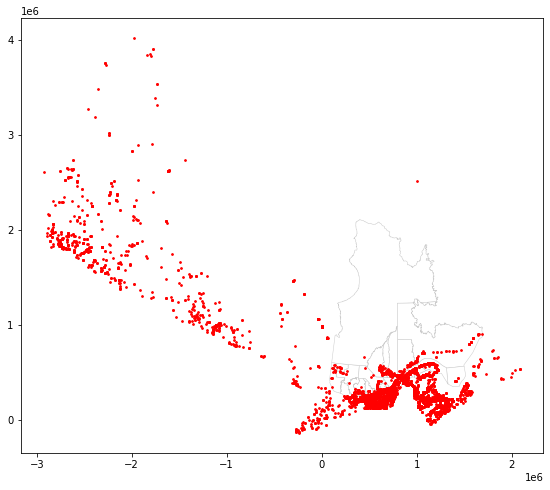

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax = quebec_boundary.plot(ax=ax, linewidth=0.5, color='white', edgecolor='0.8')
flood_data.plot(ax=ax, markersize=3, color='red')

### Selection of the Area of Interest (AOI)

###### The historical Flood data willl be merge to the Quebec electorial division data, the count of each divition willbe ploted,the location with the highest number of historical flod occurene will be used in this study, this will  enable us to have enough trainingdata set for this study. The point data will be joined to the polygon boumdary uisng spatial join function in Geopandas

In [ ]:
# Perform a spatial join between the point and polygon GeoDataFrames
aggregated= gpd.sjoin(flood_data, quebec_boundary, how="left", op="within")

# Calculate the count of points within each polygon
count = aggregated.groupby("NM_CEP").count()
count_df = pd.DataFrame(count)
count_df_1 = count_df.rename(columns={'uuid':'flood_count'}).reset_index()
quebec_flood = count_df_1[['NM_CEP','flood_count' ]]

# Join the count back to the polygon GeoDataFrame
quebec_flood = quebec_flood.merge(quebec_flood , on="NM_CEP")

In [ ]:
quebec_flood .head()

NM_CEP  flood_count_x  flood_count_y
0    Abitibi-Est              7              7
1  Abitibi-Ouest             14             14
2     Argenteuil             90             90
3     Arthabaska             24             24
4    Beauce-Nord            147            147

In [ ]:
quebec_flood.nlargest(5,'flood_count_x')

NM_CEP  flood_count_x  flood_count_y
31             Gaspé            158            158
59  Matane-Matapédia            155            155
4        Beauce-Nord            147            147
11       Bonaventure            141            141
8           Berthier            109            109

### We can Select any of the location with top 5 flood occurences in the study area. The Bonaventure electorial area was selected as the AOI. The ara is selected because is in the top 5. any location can be selected. The flood data will be clip to Bonaventure boundary extent

In [ ]:
# select hte boundary of the AOI
Bonaventure_boundary = quebec_boundary[quebec_boundary['NM_CEP']=='Bonaventure']

In [ ]:
# use the selected AOI boundary clip the flood data to the AOI selected
Bonaventure_flood = flood_data.clip(Bonaventure_boundary)

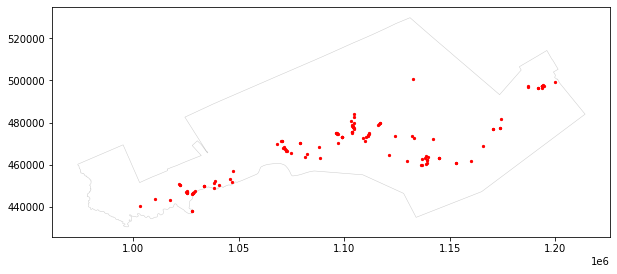

In [ ]:
# plot the flood data
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = Bonaventure_boundary.plot(ax=ax, linewidth=0.5, color='white', edgecolor='0.8')
Bonaventure_flood.plot(ax=ax, markersize=5, color='red');

### The independent variables that will be use in building this model are in raster format, they will be extracted from google earth engine and downloaded uisng geemap and ee API.

In [ ]:
# import google eath enigne libary for python
import io
import geemap
import ee

In [ ]:
# Autheticate the Google earth engine ee login
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=2OEKg9S4iq6HMPY4FIk4uRtqRxLFqLSJQ6_PkmdjFps&tc=j6zp5f4Nv07Wlfgthz_KGtDxpa6UhOozVrM-ibfyQxc&cc=B7BRBgb3ZxEF3eOb5QnpaRfrQl8MRdnEdTqSvM-h_zs

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AWtgzh6cCvwUCGZ4l_Qw_MDf91LFRB3dqDF4qePQGN9H5ryeVp_oKpOQMv0

Successfully saved authorization token.


In [ ]:
# instatiate  geemap object 
Map = geemap.Map()

#### Collect Slope, Elevation and Land cover data from Gee data catalogue

Define the study area boundary

In [ ]:
# convert the boundary shapefile to ESPG 4326
Bonaventure_bd = Bonaventure_boundary.to_crs(epsg=4326)

import json

# define a helper function to put the geodataframe in the right format for constructing an ee object
def shp_to_ee_fmt(geodf):
    data = json.loads(geodf.to_json())
    return data['features'][0]['geometry']['coordinates']

# create the ee object
feature_cls = ee.Geometry.MultiPolygon(shp_to_ee_fmt(Bonaventure_bd))

In [ ]:
#load SRTM data from google earth engine
srtm = ee.Image('CGIAR/SRTM90_V4')
# load ESA 2020 World wide 10m land cover  data form google earth engine catalog

collection = (
    ee.ImageCollection('ESA/WorldCover/v200')
    .filterBounds(feature_cls)
)


# Generate individual raster data
elevation = srtm.select('elevation')
slope = ee.Terrain.slope(elevation)
landuse = collection.aggregate_array('system:index').getInfo()

image = collection.first()


# clip all the images load to the study area
elevation_clip  = elevation.clip(feature_cls)
slope_clip = slope.clip(feature_cls)
landcover_clip = image.clip(feature_cls)

# visualization parameters
elevation_viz = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
}

slope_viz = {
    'min': 0,
    'max': 60,
    'palette': ['brown', 'yellow', 'green']
}

landcover_viz = {
  'min': 0,
  'max': 100,
  'palette': [
      'FC6D26', 'FCAF17', 'E8EB45', '34B334', '4C7EAF',
      'B05AFF', 'A56F37', '914D25', 'BFC0C3', 'FFFFFF',
  ]
}




Map.addLayer(elevation_clip, elevation_viz, 'Elevation')
Map.addLayer(slope_clip, slope_viz, 'Slope')
Map.addLayer(landcover_clip, landcover_viz, 'Landcover')
Map.centerObject(elevation_clip, 8)

Map

Map(center=[48.22367501325826, -65.87034798006636], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# save the data the the current working directory
geemap.ee_export_image(elevation_clip, os.path.join(cwd,'elevation.tif'), scale=90,region=feature_cls)
geemap.ee_export_image(slope_clip, os.path.join(cwd,'slope.tif'), scale=90,region=feature_cls)
geemap.ee_export_image(landcover_clip, os.path.join(cwd,'landcover.tif'), scale=90, region=feature_cls)

Generating URL ...
Please wait ...
Data downloaded to /content/elevation.tif
Generating URL ...
Please wait ...
Data downloaded to /content/slope.tif
Generating URL ...
Please wait ...
Data downloaded to /content/landcover.tif


Load historical Flood data

In [ ]:
Bonaventure_flood.head()

uuid  \
1537  2de67bac-a057-41f1-b083-30f6fbbf81e9   
4269  ba37dcb6-8253-448d-8dd8-2d2bd9df21ae   
6208  6d3a5aae-c130-4d49-98ad-f9c81f1e1f58   
4271  77c6066e-4462-48ee-8a97-9e429aa8e918   
4270  0b3d7589-6eed-41d8-91c2-8302d3f80d83   

                                  event_id event_name  year  start_date  \
1537  dbae8959-f2e0-4bdc-a5d6-84007dec140c        NaN  2020  2020-11-30   
4269  5038c2e0-55f4-4565-9729-b5673bcaa1a6        NaN  2003  2003-10-15   
6208  fe20a3cd-43a0-4831-9488-3bf21fcf0918        NaN  2008  2008-08-03   
4271  90391499-ff11-4d65-8e8a-9d4edb9e6d6a        NaN  2004  2004-05-01   
4270  494eb3c8-088e-4330-8fd1-e5bb2856183e      Irene  2011  2011-08-28   

        end_date             locality  season province_territory  \
1537  2020-12-02     Carleton-sur-Mer  autumn                 QC   
4269  2003-11-13  Carleton-Saint-Omer  autumn                 QC   
6208  2008-08-04           Saint-Omer  summer                 QC   
4271         NaN             Nouvelle  spring                 QC   
4270  2011-08-30     Carleton-sur-Mer  summer                 QC   

     province_territory_description  ...                        link_1  \
1537                         Quebec  ...  https://donneesquebec.ca/fr/   
4269                         Quebec  ...  https://donneesquebec.ca/fr/   
6208                         Quebec  ...  https://donneesquebec.ca/fr/   
4271                         Quebec  ...  https://donneesquebec.ca/fr/   
4270                         Quebec  ...  https://donneesquebec.ca/fr/   

                                                 link_2 source_1  \
1537  https://www.securitepublique.gouv.qc.ca/securi...     MSPQ   
4269                                                NaN     MSPQ   
6208                                                NaN     MSPQ   
4271                                                NaN     MSPQ   
4270                                                NaN     MSPQ   

                                   source_1_description source_2  \
1537  Événements de sécurité civile du ministère de ...      NaN   
4269  Événements de sécurité civile du ministère de ...      NaN   
6208  Événements de sécurité civile du ministère de ...      NaN   
4271  Événements de sécurité civile du ministère de ...      NaN   
4270  Événements de sécurité civile du ministère de ...      NaN   

     source_2_description geometry_source  \
1537                  NaN           CGNDB   
4269                  NaN            MSPQ   
6208                  NaN            MSPQ   
4271                  NaN            MSPQ   
4270                  NaN            MSPQ   

                            geometry_source_description  \
1537               Canadian Geographical Names Database   
4269  Événements de sécurité civile du ministère de ...   
6208  Événements de sécurité civile du ministère de ...   
4271  Événements de sécurité civile du ministère de ...   
4270  Événements de sécurité civile du ministère de ...   

                                        weather_station  \
1537  https://climat.meteo.gc.ca/historical_data/sea...   
4269  https://climat.meteo.gc.ca/historical_data/sea...   
6208  https://climat.meteo.gc.ca/historical_data/sea...   
4271  https://climat.meteo.gc.ca/historical_data/sea...   
4270  https://climat.meteo.gc.ca/historical_data/sea...   

                            geometry  
1537  POINT (1088531.362 463257.901)  
4269  POINT (1081217.970 463875.594)  
6208  POINT (1082467.435 464866.379)  
4271  POINT (1074916.801 465596.199)  
4270  POINT (1088298.029 468411.453)  

[5 rows x 25 columns]

### Now we have the flooded dataset, since this is a classification problem, we need to generate dataset unflooded location to train our model, we will generate 300 random points and then eliminate points that fall on any locassion with less than 100m elevation value, which means any radnomly gnerated points on a lower elevation values are liable to flooding.

Generate Random points within the boundary

In [ ]:
# Load the boundary
boundary =  Bonaventure_boundary

# Define the number of random points you want to generate
num_points = 300

# Generate the random points within the shapefile boundary
points = []
while len(points) < num_points:
    # Generate a random point within the extent of the boundary
    x = random.uniform(boundary.bounds.minx, boundary.bounds.maxx)
    y = random.uniform(boundary.bounds.miny, boundary.bounds.maxy)
    point = Point(x, y)
    
    # Check if the point is within the boundary
    if point.within(boundary.geometry.values[0]):
        points.append(point)

# Convert the list of points to a GeoDataFrame
crs = boundary.crs
random_points_gdf = gpd.GeoDataFrame(geometry=points, crs=crs)
random_points_gdf.head()

geometry
0  POINT (1123146.206 469246.249)
1  POINT (1159826.277 456076.304)
2  POINT (1190502.498 481360.732)
3  POINT (1062671.815 497700.530)
4   POINT (998266.577 459323.385)

In [ ]:
len(random_points_gdf)

300

Plot the random points within the boundary

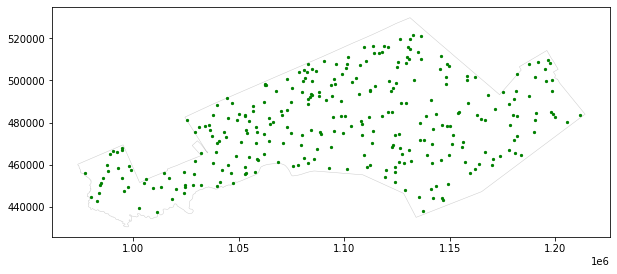

In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1)
ax = Bonaventure_boundary.plot(ax=ax, linewidth=0.5, color='white', edgecolor='0.8')
random_points_gdf.plot(ax=ax, markersize=5, color='green');

### Merge the two points and label it as 1 and 0

merge the flood hisotyr points and the randomly generated points and label the data.

1- Flooded

0- non-Flooded

In [ ]:
Bonaventure_flood['label'] = 1
flood = Bonaventure_flood[["label","geometry"]]
flood.head()

label                        geometry
1537      1  POINT (1088531.362 463257.901)
4269      1  POINT (1081217.970 463875.594)
6208      1  POINT (1082467.435 464866.379)
4271      1  POINT (1074916.801 465596.199)
4270      1  POINT (1088298.029 468411.453)

In [ ]:
random_points_gdf['label'] = 0
no_flood = random_points_gdf[["label","geometry"]]
no_flood.head()

label                        geometry
0      0  POINT (1123146.206 469246.249)
1      0  POINT (1159826.277 456076.304)
2      0  POINT (1190502.498 481360.732)
3      0  POINT (1062671.815 497700.530)
4      0   POINT (998266.577 459323.385)

In [ ]:
flood_dataset = pd.concat([flood , no_flood], ignore_index=True)
flood_dataset.head()

label                        geometry
0      1  POINT (1088531.362 463257.901)
1      1  POINT (1081217.970 463875.594)
2      1  POINT (1082467.435 464866.379)
3      1  POINT (1074916.801 465596.199)
4      1  POINT (1088298.029 468411.453)

In [ ]:
flood_dataset.tail()

label                        geometry
436      0  POINT (1068457.889 461344.807)
437      0  POINT (1051284.175 470827.764)
438      0  POINT (1096129.000 507684.354)
439      0  POINT (1141429.875 469747.965)
440      0  POINT (1135642.587 444603.947)

In [ ]:
len(flood_dataset)

441

Plot the  flood datasets training smapling points

### Load the downloaded raster data set, check the projection and reproject it to the projection of the 

In [ ]:
# print the crs of the flood dataset
print(flood_dataset.crs)

EPSG:3798


In [ ]:
# Load the slope, elevation, and land use rasters
slope = rasterio.open(os.path.join(cwd,'slope.tif'),
                      mode='r', driver="GTiff")
elevation = rasterio.open(os.path.join(cwd,'elevation.tif'),
                         mode='r', driver="GTiff")
land_use = rasterio.open(os.path.join(cwd,'landcover.tif'),
                         mode='r', driver="GTiff")

Check if the images crs is the same with the point dataset

In [ ]:
print(slope.crs), print(elevation.crs), print(land_use.crs)

EPSG:4326
EPSG:4326
EPSG:4326


(None, None, None)

#### Reprojection did not work for all my dataset, so i  later had to reproject the point dataset to the raster dataset crs since i have been looking for a way to work around it and it not working, but for future reference, and maybe when there is more time, i can find out why my reprojected landuse is shwoing zero.

Since the raster crs is not mathcing with our training data points, to extract the values of each rasterdata to the points, we need to reproject the raster dataset to the flood dataset local datum (epsg:3798), this will make all the data overlay on each other.

In [ ]:
# os.chdir(cwd) # change to current working folder
# gdal.Warp('projected_slope.tif','slope.tif', dstSRS="EPSG:3798")
# gdal.Warp('projected_elevation.tif','elevation.tif', dstSRS="EPSG:3798")
# gdal.Warp('projected_landuse.tif','landcover.tif', dstSRS="EPSG:3798", xRes =90, yRes=90)

In [ ]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Open the input file
with rasterio.open('landcover.tif') as src:
    # Define the target CRS and resolution
    dst_crs = 'EPSG:3798'
    dst_res = (30, 30)

    # Calculate the transformation parameters for reprojection
    transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds, resolution=dst_res)

    # Create the output file
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rasterio.open('projected_landuse.tif', 'w', **kwargs) as dst:
        # Reproject the data from the input file to the output file
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.bilinear
            )

Now, Load the Reprojected data into the Notebook and check the crs 

In [ ]:
# # Load the slope, elevation, and land use rasters
# proj_slope = rasterio.open(os.path.join(cwd,'projected_slope.tif'),
#                       mode='r', driver="GTiff")
# proj_elevation =  rasterio.open(os.path.join(cwd,'projected_elevation.tif'),
#                          mode='r', driver="GTiff")
# proj_landuse = rasterio.open(os.path.join(cwd,'projected_landuse.tif'),
#                          mode='r', driver="GTiff")

In [ ]:
# print(proj_slope.crs), print(proj_elevation.crs), print(proj_slope.crs)

Plot the three Raster dataset
This code will create a figure with three subplots, one for each raster dataset.

In [ ]:
# from matplotlib.colors import ListedColormap

# # Get the raster data arrays and the coordinate reference systems (CRS) for each dataset
# slope_data = proj_slope.read(1)
# elevation_data = proj_elevation.read(1)
# landuse_data = proj_landuse.read(1)

# # Create a figure object and add three subplots
# fig, axs = plt.subplots(3, 1, figsize=(25, 10))

# # Plot each raster dataset on a subplot
# axs[0].imshow(slope_data, cmap='Greys_r')
# axs[0].set_title('Slope')
# axs[1].imshow(elevation_data, cmap='Greys_r')
# axs[1].set_title('Elevation')
# axs[2].imshow(landuse_data, cmap=ListedColormap(['green', 'yellow', 'brown']))
# axs[2].set_title('Land Use')


# # Adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.2)

# # Show the plot
# plt.show()

### Now lets reproject our point data to the raster crs, extarct the values and also plot the raster data.

Since the raster crs is not mathcing with our training data points, to extract the values of each rasterdata to the points, we need to reproject the raster dataset to the flood dataset local datum (epsg:4326), this will make all the data overlay on each other.

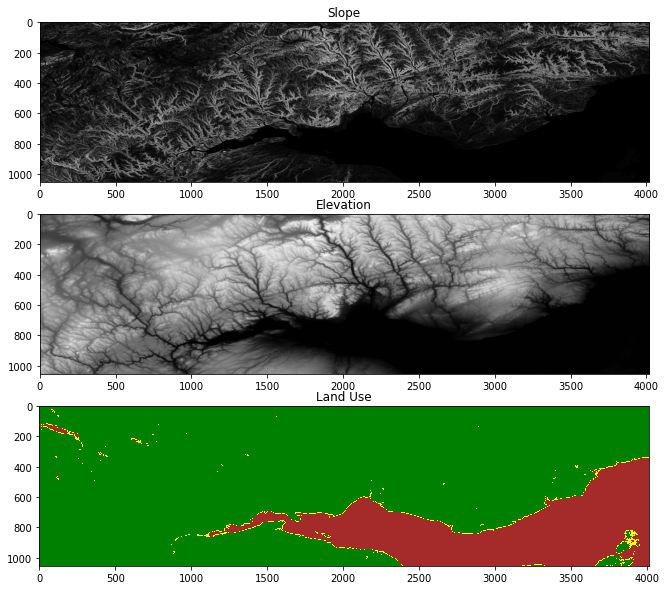

In [ ]:
from matplotlib.colors import ListedColormap

# Get the raster data arrays and the coordinate reference systems (CRS) for each dataset
slope_data = slope.read(1)
elevation_data = elevation.read(1)
landuse_data = land_use.read(1)

# Create a figure object and add three subplots
fig, axs = plt.subplots(3, 1, figsize=(25, 10))

# Plot each raster dataset on a subplot
axs[0].imshow(slope_data, cmap='Greys_r')
axs[0].set_title('Slope')
axs[1].imshow(elevation_data, cmap='Greys_r')
axs[1].set_title('Elevation')
axs[2].imshow(landuse_data, cmap=ListedColormap(['green', 'yellow', 'brown']))
axs[2].set_title('Land Use')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

In [ ]:
flood_dataset.to_crs(epsg=4326,inplace=True)

Extract all the values from each raster dataset to the flood dataset
 To understand what each values of LULC represent got to https://developers.google.com/earth-engine/datasets/catalog/ESA_WorldCover_v200#bands

In [ ]:
# Get the values of slope, elevation, and land use at the location of the random points
for index, point in flood_dataset.iterrows():
    # Get the coordinates of the point
    x = point.geometry.x
    y = point.geometry.y
    
    # Get the row and column indices of the point in the rasters
    row, col = slope.index(x, y)
    
    # Extract the values of slope, elevation, and land use at the location of the point
    point_slope = slope.read(1)[row, col]
    point_elevation = elevation.read(1)[row, col]
    point_land_use = land_use.read(1)[row, col]
  
    # Append the values to the point's attributes
    flood_dataset.loc[index, 'slope'] = point_slope
    flood_dataset.loc[index, 'elevation'] = point_elevation
    flood_dataset.loc[index, 'land_use'] = point_land_use
    
# read the dataset to view the addeded columns
flood_dataset.head()

label                    geometry      slope  elevation  land_use
0      1  POINT (-66.12199 48.10175)   0.000000        7.0      30.0
1      1  POINT (-66.21972 48.11057)   1.544594        8.0      30.0
2      1  POINT (-66.20230 48.11892)   3.038545       13.0      10.0
3      1  POINT (-66.30319 48.12878)   1.036607        5.0      40.0
4      1  POINT (-66.12164 48.14817)  12.976025      482.0      10.0

Check the elevation range for flooded data and check the elevation range too for non-flooded, filter out all non-flododed data with low elevations values.

In [ ]:
flood_dataset.elevation.max(), flood_dataset.elevation.min()

(582.0, 0.0)

In [ ]:
flood_dataset.slope.max(),flood_dataset.slope.min()

(35.5532341003418, 0.0)

In [ ]:
flood_dataset.land_use.max(),flood_dataset.land_use.min()

(90.0, 10.0)

##### Drop all non flooded data located located on a place where elevation is less than 100m. It is a common knowlegde that locations with lower elevation are more prone to flooding, therefore,location with elevation value less than 100m will be dropped

In [ ]:
flood_dataset = flood_dataset.drop(flood_dataset[(flood_dataset['label']==0) & (flood_dataset['elevation']<=100)].index)
len(flood_dataset)

357

### Exploratory Data Analysis

Now lets explore our dataset, we will check for missing value, plor our data and also check the correlation between the dataset

In [ ]:
flood_dataset.head()

label                    geometry      slope  elevation  land_use
0      1  POINT (-66.12199 48.10175)   0.000000        7.0      30.0
1      1  POINT (-66.21972 48.11057)   1.544594        8.0      30.0
2      1  POINT (-66.20230 48.11892)   3.038545       13.0      10.0
3      1  POINT (-66.30319 48.12878)   1.036607        5.0      40.0
4      1  POINT (-66.12164 48.14817)  12.976025      482.0      10.0

In [ ]:
#check that there is no no data values in the dataset
print(flood_dataset.isnull().sum())

label        0
geometry     0
slope        0
elevation    0
land_use     0
dtype: int64


In [ ]:
#describe the dataset
flood_dataset.describe()

label       slope   elevation    land_use
count  357.000000  357.000000  357.000000  357.000000
mean     0.394958    8.008359  227.182073   19.019608
std      0.489528    7.423543  175.850543   20.755185
min      0.000000    0.000000    0.000000   10.000000
25%      0.000000    2.073081   25.000000   10.000000
50%      0.000000    6.037485  228.000000   10.000000
75%      1.000000   11.693336  389.000000   10.000000
max      1.000000   35.553234  582.000000   90.000000

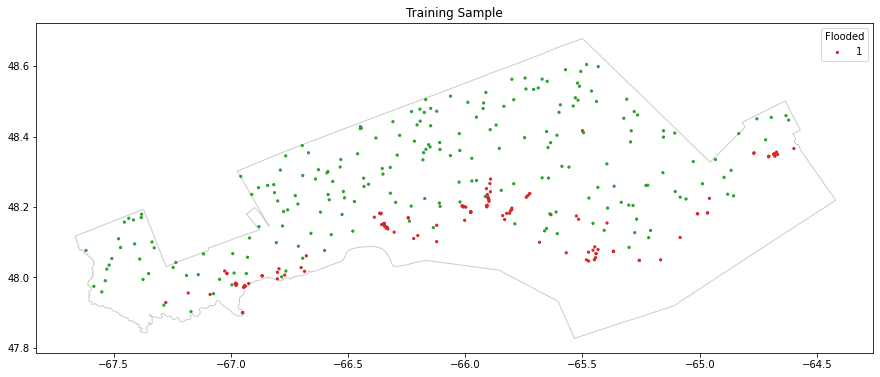

In [ ]:
colors = ['tab:green', 'tab:red']
cmap = ListedColormap(colors)

#change boundary crs#
boundary = Bonaventure_boundary.to_crs(epsg=4326) 

# Define the labels for the legend
legend_labels = {1: 'Yes', 0: 'No'}

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax = boundary.plot(ax=ax, linewidth=1, color='white', edgecolor='0.8')
flood_dataset.plot(column='label', categorical=True, legend=True,
              markersize=5, marker='o',cmap=cmap, ax=ax)



# Add title and legend
plt.title('Training Sample')
plt.legend(title='Flooded', loc='upper right', labels=legend_labels)


# Show the plot
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

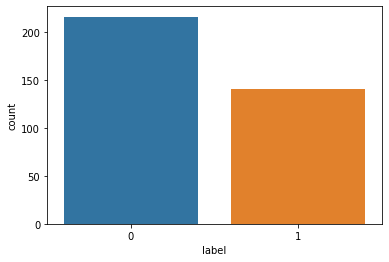

In [ ]:
#Understand the data 
#Here we can see that we have a balanced dataset (equal number of flooded and non flooeded locations
sns.countplot(x="label", data=flood_dataset) #0 - Non-flooded   1 - Flooded

The correlation map generated from my dataset showed that there is a strong positive correlation between the label and land use pattern, meaning that land use is a strong predictor of the label variable. The map also showed a high inverse correlation between elevation data and land use data, meaning that certain land use patterns are associated with different elevations. Additionally, there is a negative correlation between slope and elevation, indicating that areas with high slopes are likely to have lower elevations.

<AxesSubplot:>

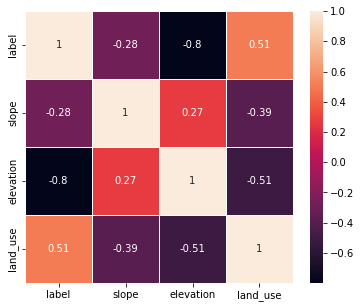

In [ ]:
# show the correlation matric for the dataset
corrMatrix = flood_dataset.corr()
fig, ax = plt.subplots(figsize=(6,5))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

###  MACHINE LEARNING MODEL

* import the Ml libaries
* load the data
* split the data into dependent and independent variable
* splitt the dataset into training and test test
* Build our model uisng Random Forest Machine Learning Algorithm
* Check the accureacy of our model uisng differernt accracy metrics
* Plot the Predicted data
* Use the prediction  Probabaility output to create a raster map that shows probability of floodding across the study area

In [ ]:
# import require libaries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
#load the dataset 
flood_dataset.head()

label                    geometry      slope  elevation  land_use
0      1  POINT (-66.12199 48.10175)   0.000000        7.0      30.0
1      1  POINT (-66.21972 48.11057)   1.544594        8.0      30.0
2      1  POINT (-66.20230 48.11892)   3.038545       13.0      10.0
3      1  POINT (-66.30319 48.12878)   1.036607        5.0      40.0
4      1  POINT (-66.12164 48.14817)  12.976025      482.0      10.0

In [ ]:
# Define the dependent variable that needs to be predicted (labels)
y = flood_dataset["label"].values

# Define the independent variables. Let's also drop gemotry and label
x = flood_dataset.drop(labels = ["label", "geometry"], axis=1) 
features_list = list(x.columns)  #List features so we can rank their importance later 

In [ ]:
#Split data into train (60 %), validate (20 %) and test (20%) to verify accuracy after fitting the model.
# training data is used to train the model
# validation data is used for hyperparameter tuning
# testing data is used to test the model

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

#### RANDOM FOREST

In [ ]:
# instantiate the Random Forest Model
model = RandomForestClassifier(random_state = 42)

# Train the model on training data
model.fit(X_train, y_train)

# make prediction for the test dataset.
prediction = model.predict(X_test)

# The prediction values are either 1 (Flooded) or 0 (Non-Flooded) 
prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0])

#### Metric Evaluation

AUC

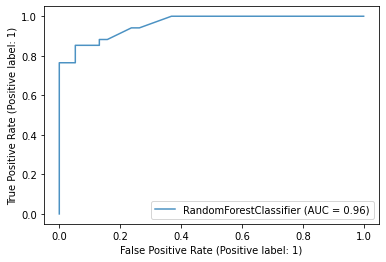

In [ ]:
# The AUC is considered one of the best performance indices
# We can plot the curve and calculate it
ax = plt.gca()
model_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Features Importance

elevation    0.661994
slope        0.229653
land_use     0.108354
dtype: float64


<AxesSubplot:>

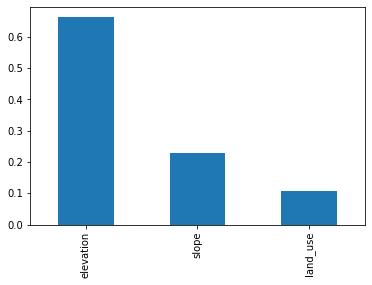

In [ ]:
# Estimate the feature importance
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

# Plot the feature importance 
feature_imp.plot.bar()

Classification Accuracy

In [ ]:
# Calculate the accuracy score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, prediction)

# Print the accuracy as a percentage
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 86.11%


### Evaluation of the results – include accuracy, ROC-AUC, feature importance and Accuracy 

In the context of machine learning, feature importance is a technique used to identify the most important predictors in a model. In this example, the feature importance scores for three predictors - elevation, slope, and land_use - were calculated using a random forest classifier. The results show that elevation is the most important predictor (with a score of 0.66), followed by slope (0.23) and land_use (0.11).

The random forest classifier achieved an AUC of 0.94, indicating that it has a high level of accuracy in distinguishing between the positive and negative classes. The accuracy of the model was also calculated and found to be 86.11%. This suggests that the model is able to accurately predict the target variable, which could be useful in a variety of applications.

Overall, the results of the feature importance analysis can help to identify the most important predictors in the model, which could be useful in guiding further research or decision-making. Additionally, the high accuracy of the model suggests that it may be a useful tool for predicting the target variable in other datasets.

### Generate 5000 new random points predictions points within the study area that will be use to predict if a location is floodeded or not

In [ ]:
random.seed(43)
# Define the number of random points you want to generate
num_points = 5000

# Generate the random points within the shapefile boundary
points = []
while len(points) < num_points:
    # Generate a random point within the extent of the boundary
    x = random.uniform(boundary.bounds.minx, boundary.bounds.maxx)
    y = random.uniform(boundary.bounds.miny, boundary.bounds.maxy)
    point = Point(x, y)
    
    # Check if the point is within the boundary
    if point.within(boundary.geometry.values[0]):
        points.append(point)

# Convert the list of points to a GeoDataFrame
crs = boundary.crs
predictive_points = gpd.GeoDataFrame(geometry=points, crs=crs)
predictive_points.head()

geometry
0  POINT (-65.48747 48.50349)
1  POINT (-66.19637 48.25270)
2  POINT (-65.89200 48.47146)
3  POINT (-66.00413 48.25074)
4  POINT (-65.16085 48.33690)

In [ ]:
len(predictive_points)

5000

### Extract all the values from the independent raster data to the predictive random points

In [ ]:
# Get the values of slope, elevation, and land use at the location of the random points
for index, point in predictive_points.iterrows():
    # Get the coordinates of the point
    x = point.geometry.x
    y = point.geometry.y
    
    # Get the row and column indices of the point in the rasters
    row, col = slope.index(x, y)
    
    # Extract the values of slope, elevation, and land use at the location of the point
    point_slope = slope.read(1)[row, col]
    point_elevation = elevation.read(1)[row, col]
    point_land_use = land_use.read(1)[row, col]
    
    # Append the values to the point's attributes
    predictive_points.loc[index, 'slope'] = point_slope
    predictive_points.loc[index, 'elevation'] = point_elevation
    predictive_points.loc[index, 'land_use'] = point_land_use
    
# read the dataset to view the addeded columns
predictive_points.head()

geometry      slope  elevation  land_use
0  POINT (-65.48747 48.50349)  15.853117      449.0      10.0
1  POINT (-66.19637 48.25270)   3.088641      509.0      10.0
2  POINT (-65.89200 48.47146)   6.163057      458.0      10.0
3  POINT (-66.00413 48.25074)  26.301714      371.0      10.0
4  POINT (-65.16085 48.33690)   4.923704      486.0      10.0

In [ ]:
# we need to remove all the columns except the predictive features
predicitve_data = predictive_points.drop(labels = ["geometry"], axis=1)
predicitve_data.head()

slope  elevation  land_use
0  15.853117      449.0      10.0
1   3.088641      509.0      10.0
2   6.163057      458.0      10.0
3  26.301714      371.0      10.0
4   4.923704      486.0      10.0

### Finally, run the model on-some untrained data and present the results in a map

In order to map the flood susceptibility, this is the prediction for each ranmdoly generated points, each list has two values probability of being not flooded , probability of being flooded]

In [ ]:
# predict if the location is flooded (1) or not flooded (0)
flood_prediction = model.predict(predicitve_data) 

In order to map the flood susceptibility we need to cacluate the probability of being flooded.

In [ ]:
flood_probability =model.predict_proba(predicitve_data) 

In [ ]:
# We need the classification info as well as the probablity of each location being flooded
# We need to add the value coressponding to each point
predictive_points['flood_prediction']= flood_prediction [:]
predictive_points['flood_probability']= flood_probability [:,1]

In [ ]:
predictive_points.head()

geometry      slope  elevation  land_use  \
0  POINT (-65.48747 48.50349)  15.853117      449.0      10.0   
1  POINT (-66.19637 48.25270)   3.088641      509.0      10.0   
2  POINT (-65.89200 48.47146)   6.163057      458.0      10.0   
3  POINT (-66.00413 48.25074)  26.301714      371.0      10.0   
4  POINT (-65.16085 48.33690)   4.923704      486.0      10.0   

   flood_prediction  flood_probability  
0                 0               0.01  
1                 0               0.01  
2                 0               0.21  
3                 0               0.00  
4                 0               0.00

Generate a Plot showing Flood Prediction wihtin the study area

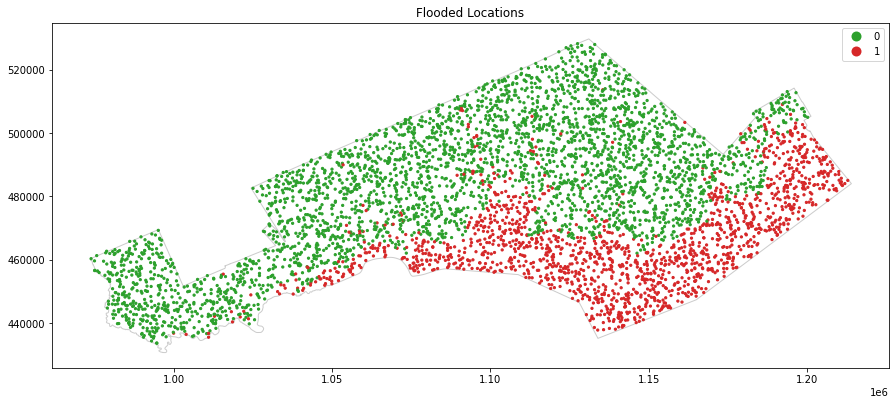

In [ ]:
colors = ['tab:green', 'tab:red']
cmap = ListedColormap(colors)

#reproject the point to the local crs#
predictive_points_pro = predictive_points.to_crs(epsg=3798) 

# Define the labels for the legend
legend_labels = {1: 'Yes', 0: 'No'}

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax = Bonaventure_boundary.plot(ax=ax, linewidth=1, color='white', edgecolor='0.8')
predictive_points_pro.plot(column='flood_prediction', categorical=True, legend=True,
              markersize=5, marker='o',cmap=cmap, ax=ax)



# Add title and legend
plt.title('Flooded Locations')
# plt.legend(title='Flooded', loc='upper right', labels=legend_labels)


# Show the plot
plt.show()

Generate the Raster data showing of the Flood Probabilty

In [ ]:
# Converting the point shapefile to raster.
# We will use the model prediction (column flood_probability in predictive_points to make a raster)
from geocube.api.core import make_geocube
import rasterio as rio

grid_data = make_geocube(vector_data=predictive_points_pro, measurements=["flood_probability"],interpolate_na_method='linear', resolution=(-30, 30))
grid_data["flood_probability"].rio.to_raster("Flood_susceptibility.tif")

Text(0.5, 1.0, 'Flood Susceptibility Map')

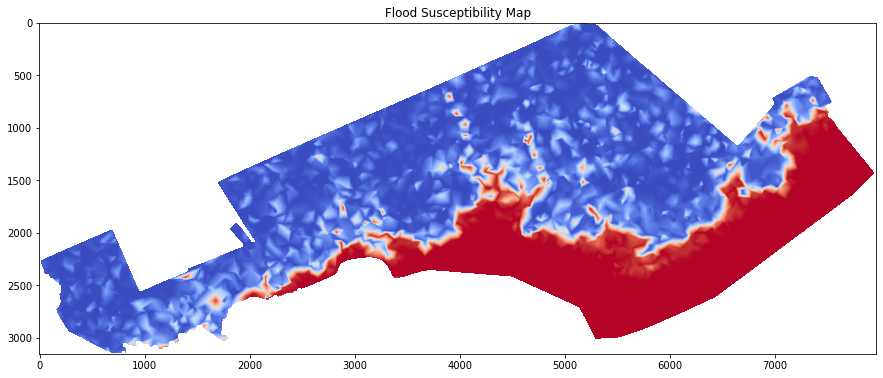

In [ ]:
from rasterio.plot import show
from matplotlib.colors import ListedColormap, BoundaryNorm

# Open the raster file
Flood_susceptibility = rasterio.open(os.path.join(cwd,'Flood_susceptibility.tif'), mode='r', driver="GTiff")

# clip the raster to its extent
clipped_flood_map, clipped_transform = rasterio.mask.mask(Flood_susceptibility , 
                                                      Bonaventure_boundary.geometry,
                                                      crop=True,
                                                      nodata=None, 
                                                      filled = False)


# Display the clipped flood susceptibility map with the new color map
fig, ax = plt.subplots(figsize=(15, 12))
show(clipped_flood_map, ax=ax, cmap='coolwarm')
ax.set_title('Flood Susceptibility Map')

In [ ]:
# you can save the flood prediction data if you want
predictive_points.to_file('flood_pred.geojson', driver="GeoJSON")